<a href="https://colab.research.google.com/github/Amrutha294/HeartStroke-Prediction/blob/main/Heart_Stroke(Modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart_stroke.zip to heart_stroke (1).zip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
import zipfile
warnings.filterwarnings('ignore')
df = pd.read_csv(r"heart_stroke (1).zip",encoding="windows-1252")

In [5]:
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,1,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0


In [6]:
df.tail()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5104,5105,0,80.0,1,0,1,1,83.75,28.89456,0,0,0,1,0,0,0,0,1,0
5105,5106,0,81.0,0,0,1,1,125.20,40.00000,0,0,0,0,1,0,0,0,1,0
5106,5107,0,35.0,0,0,1,0,82.99,30.60000,0,0,0,0,1,0,0,0,1,0
5107,5108,1,51.0,0,0,1,0,166.29,25.60000,0,0,0,1,0,0,0,1,0,0
5108,5109,0,44.0,0,0,1,1,85.28,26.20000,0,1,0,0,0,0,1,0,0,0


In [7]:
df.shape

(5109, 19)

In [8]:
df.columns

Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop_duplicates()

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
bmi,0
stroke,0


In [12]:
df.describe()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,2554.390096,0.413975,43.229986,0.097475,0.054022,0.656293,0.508123,106.140399,28.894560,0.048738,0.128597,0.004306,0.572323,0.160305,0.134469,0.302212,0.173028,0.370327,0.154433
std,1475.397748,0.492592,22.613575,0.296633,0.226084,0.474991,0.499983,45.285004,7.698235,0.215340,0.334786,0.065486,0.494790,0.366925,0.341188,0.459261,0.378308,0.482939,0.361399
min,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1277.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2554.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3832.000000,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5109.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
Continuous Features: ['Unnamed: 0', 'age', 'avg_glucose_level', 'bmi']


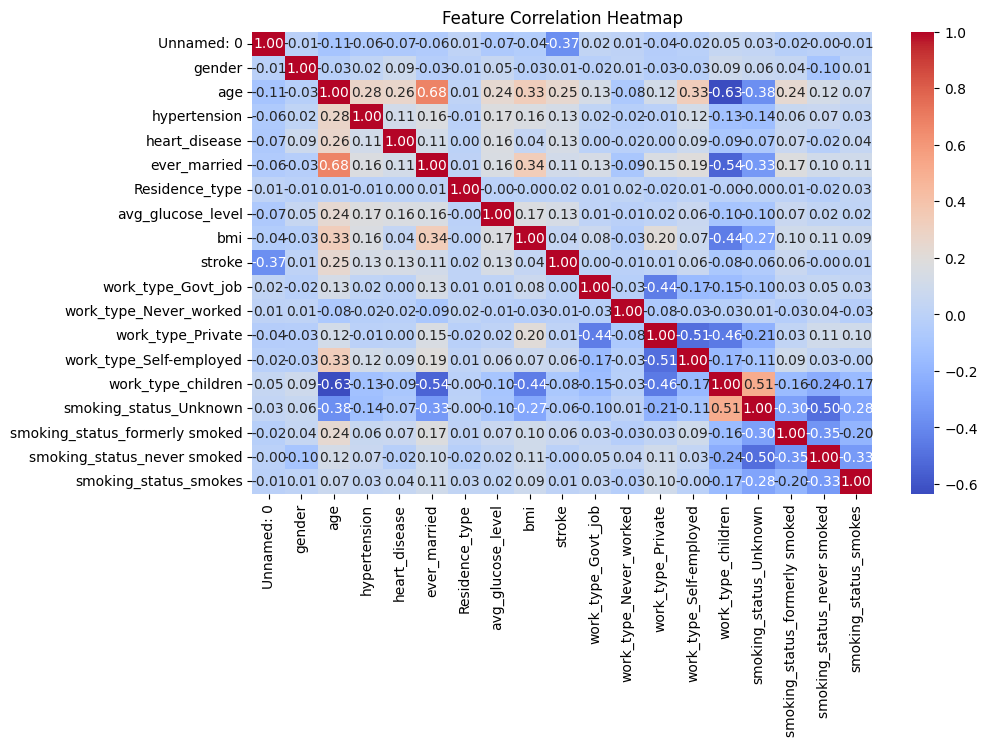

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

In [19]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

In [20]:
for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.xticks(rotation = 90)
    plt.show()

In [21]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

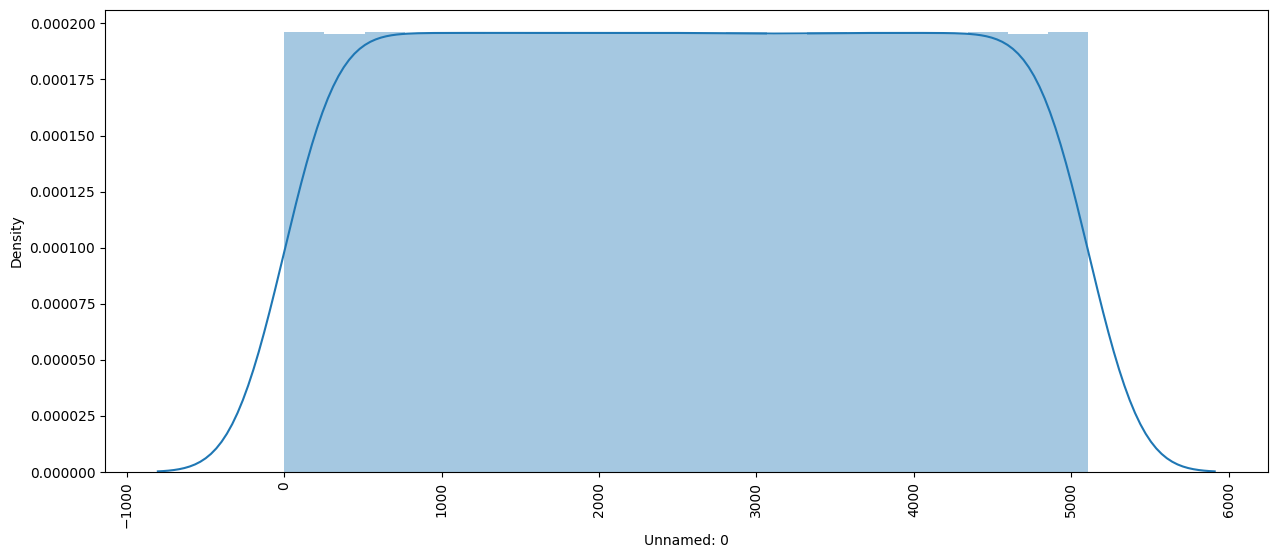

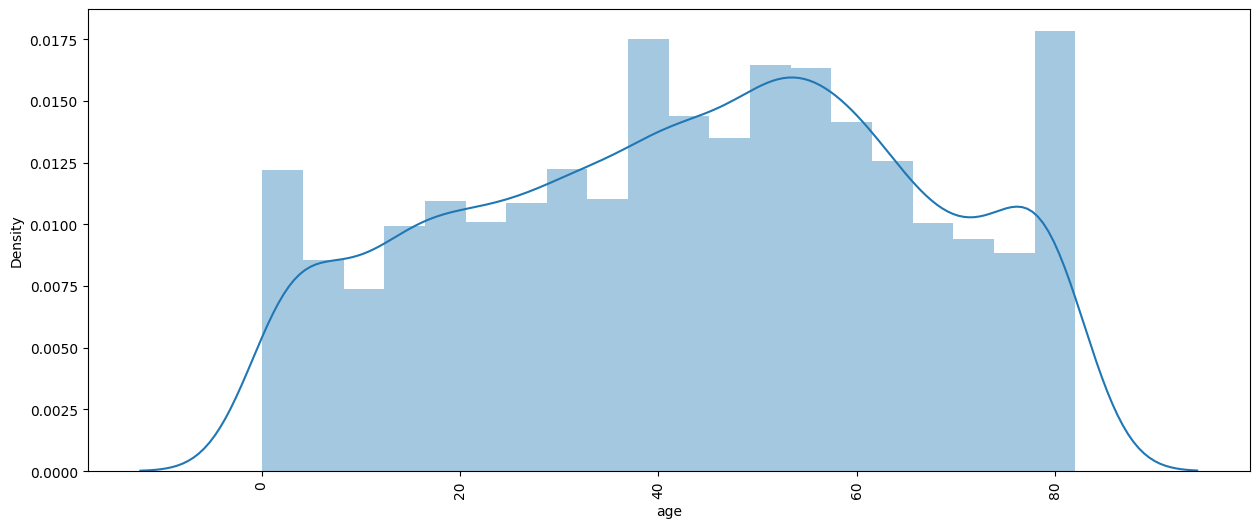

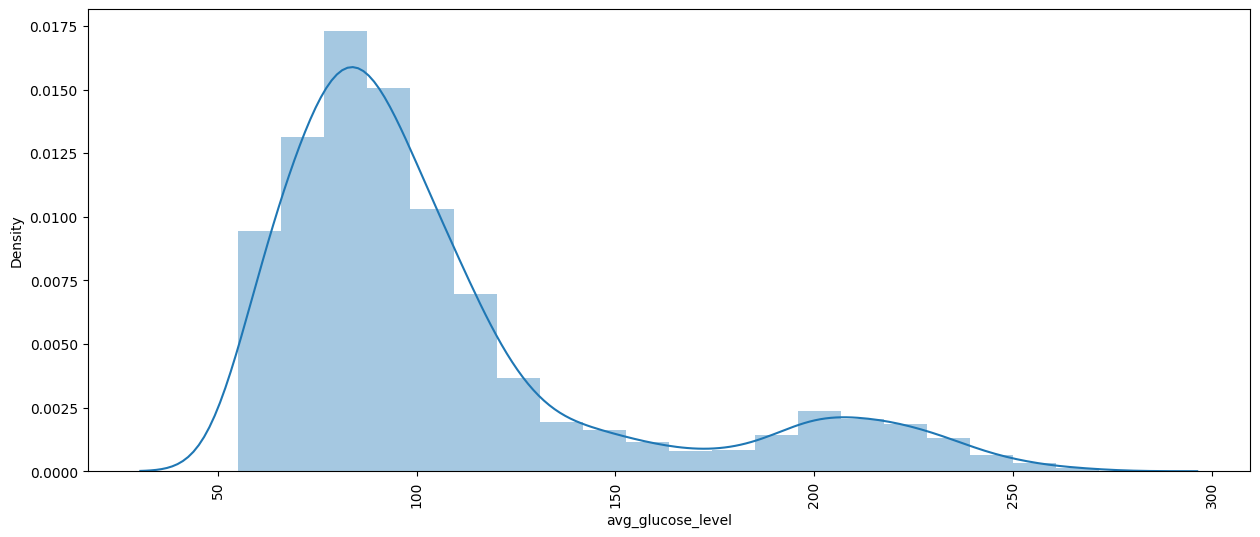

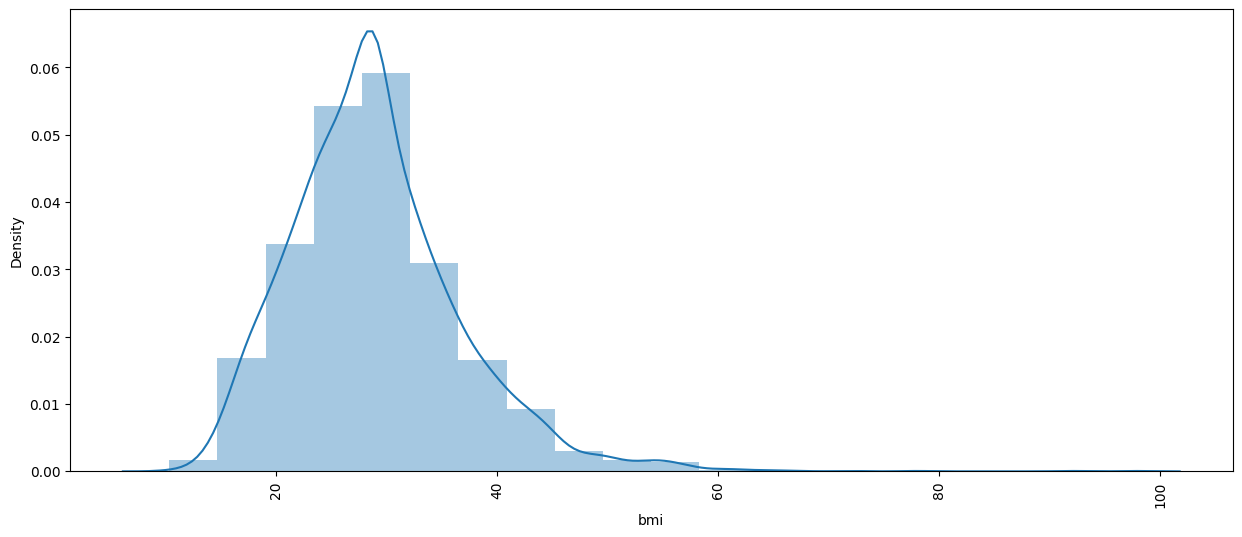

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

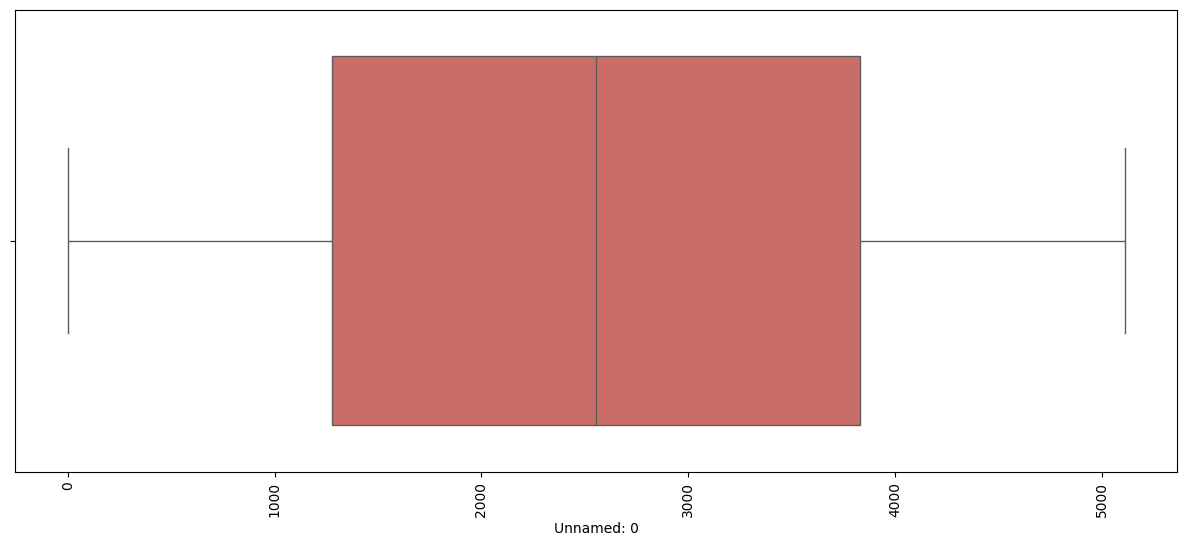

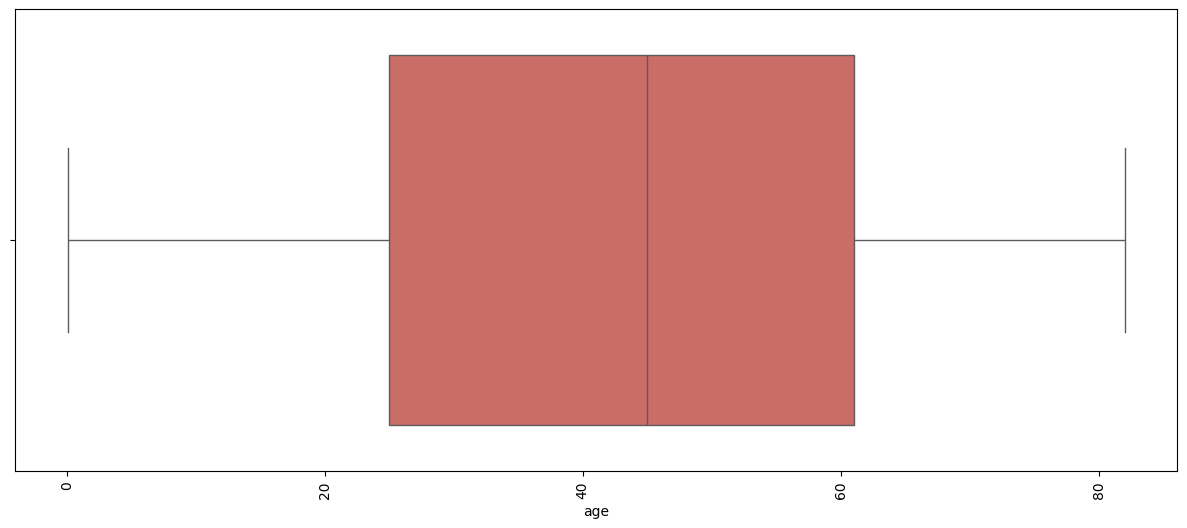

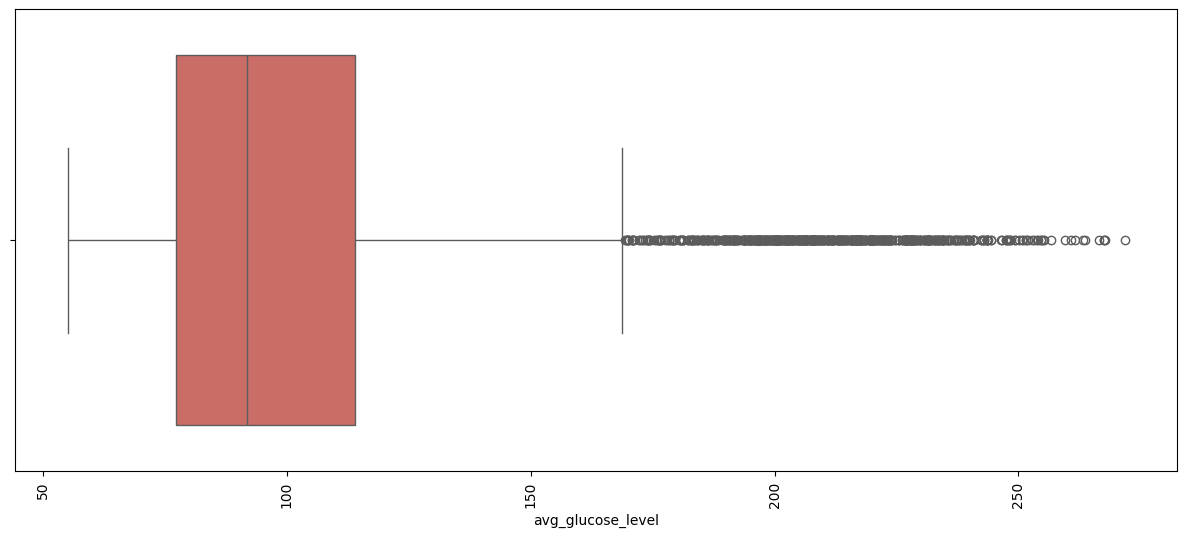

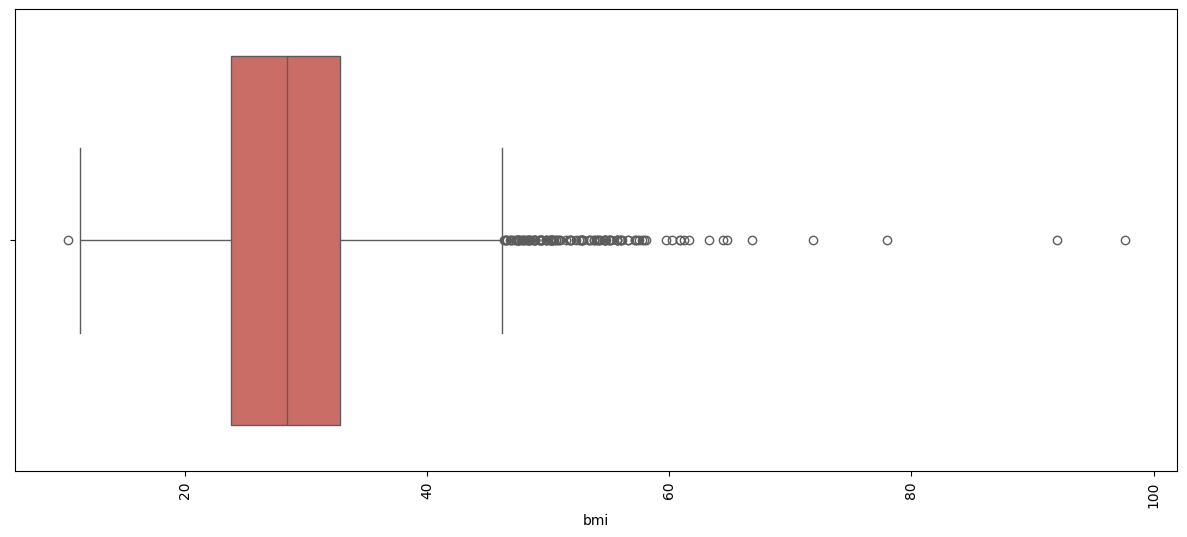

In [23]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

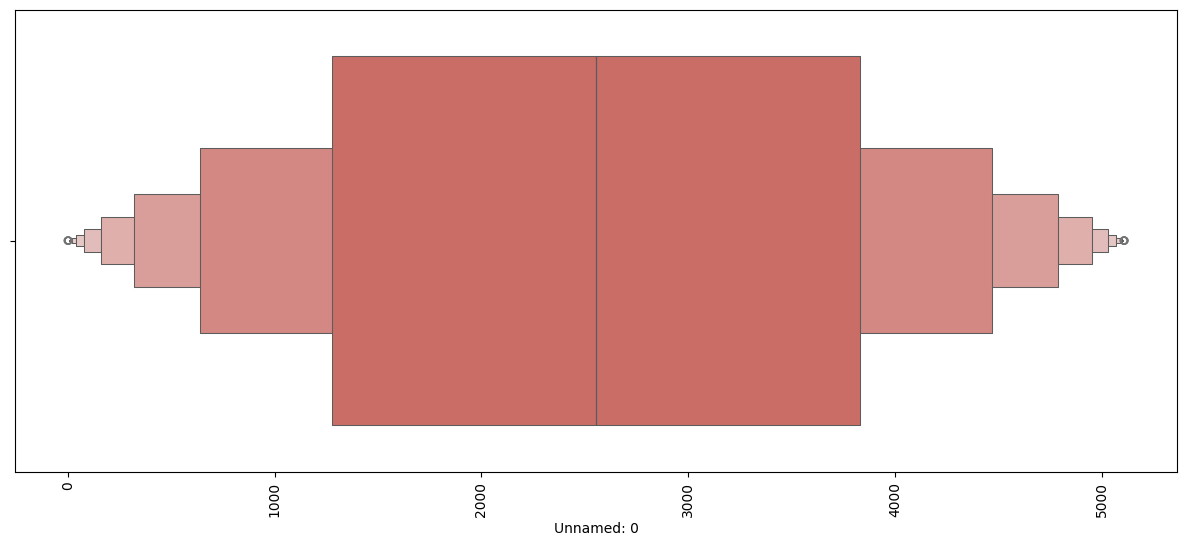

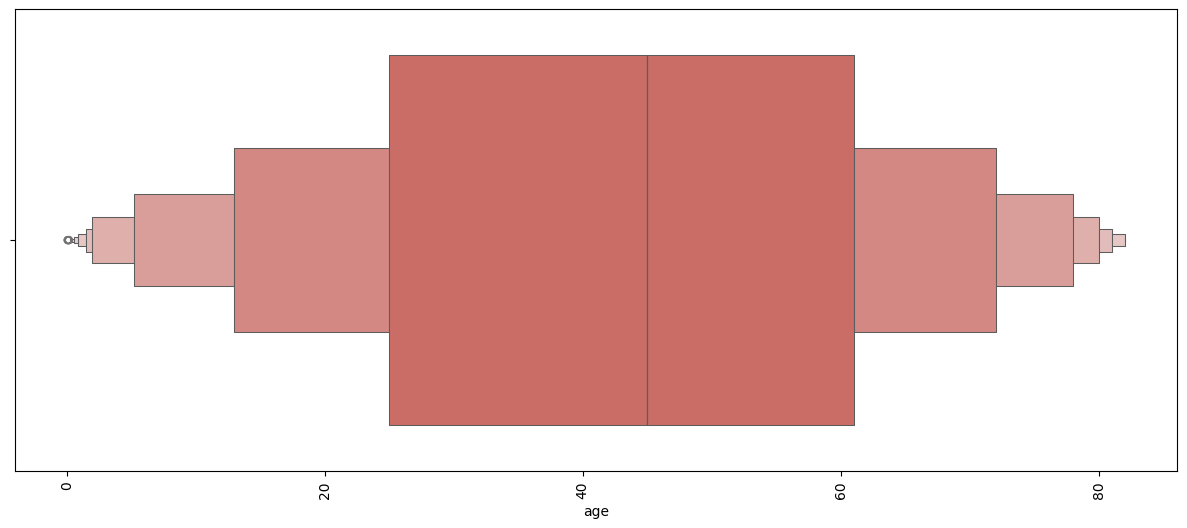

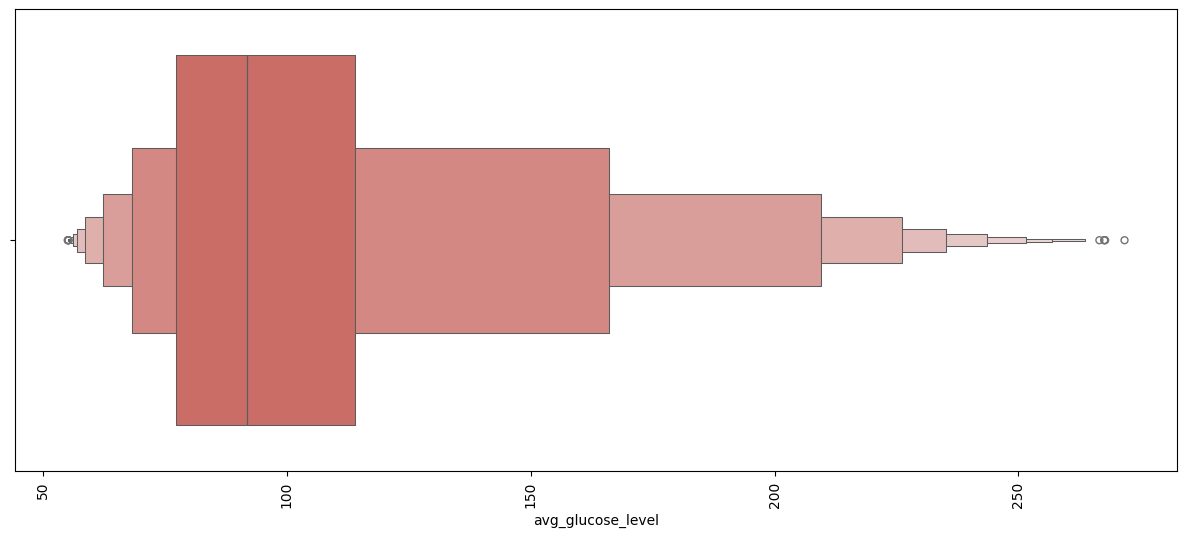

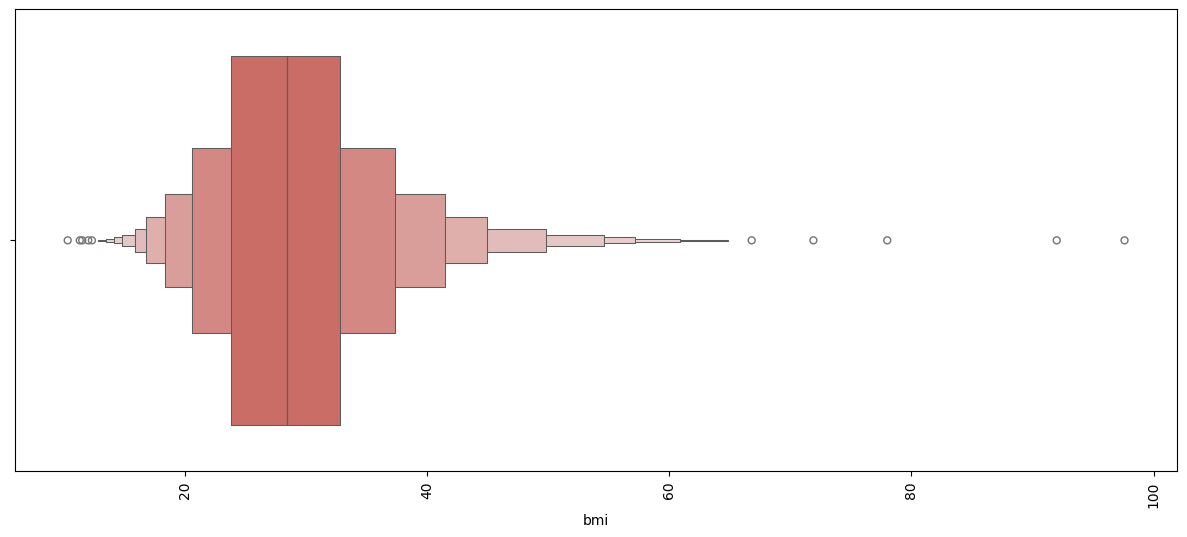

In [24]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

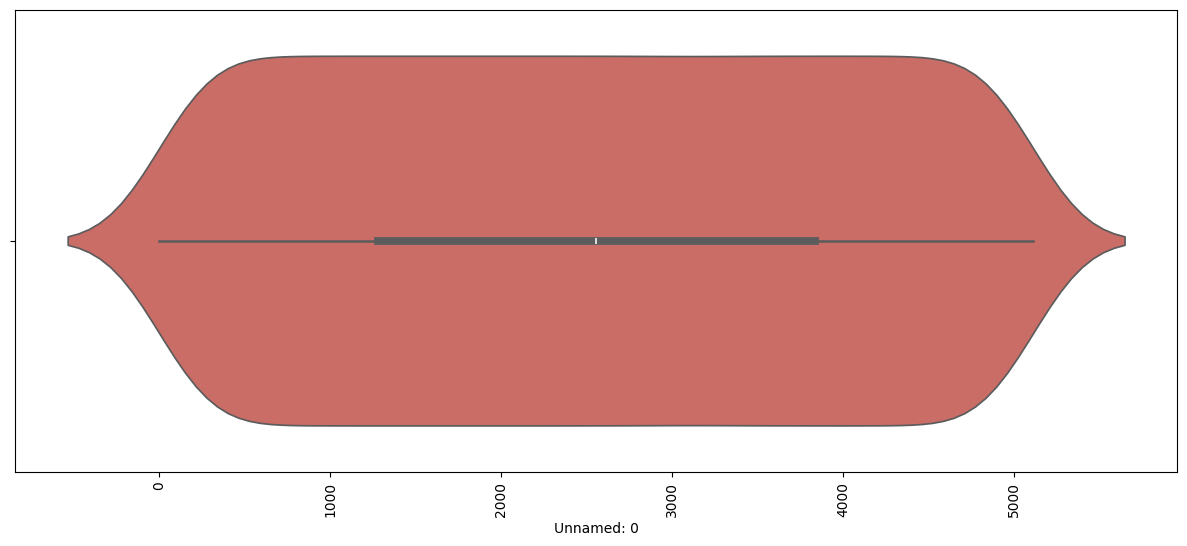

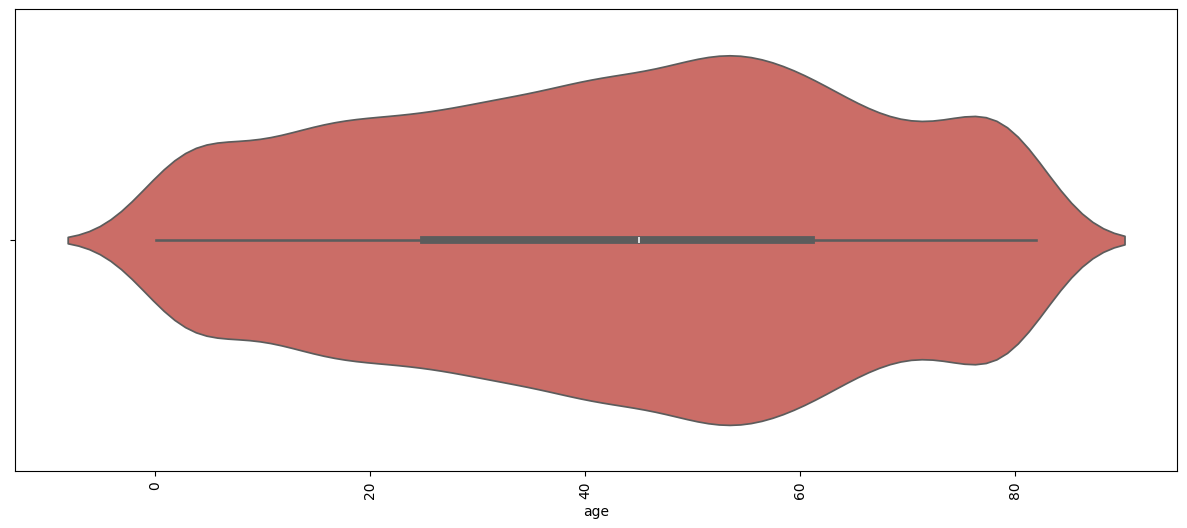

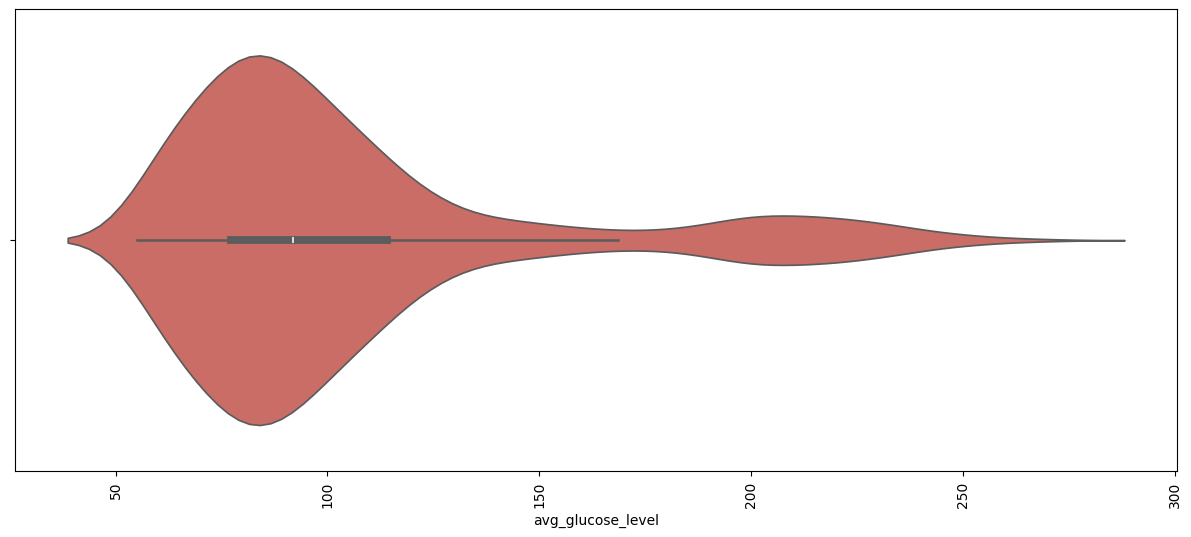

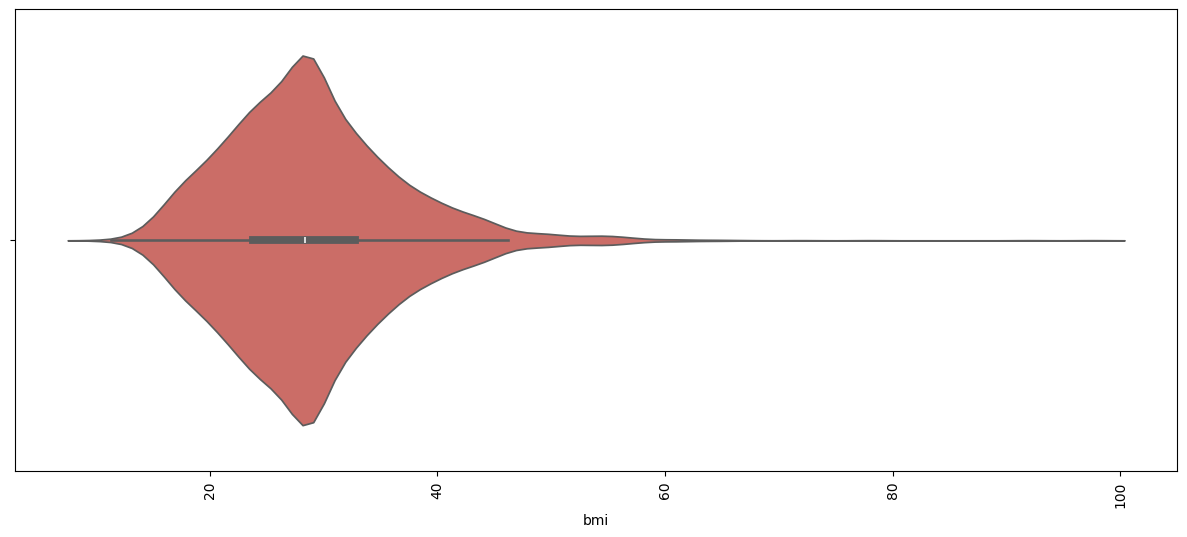

In [25]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

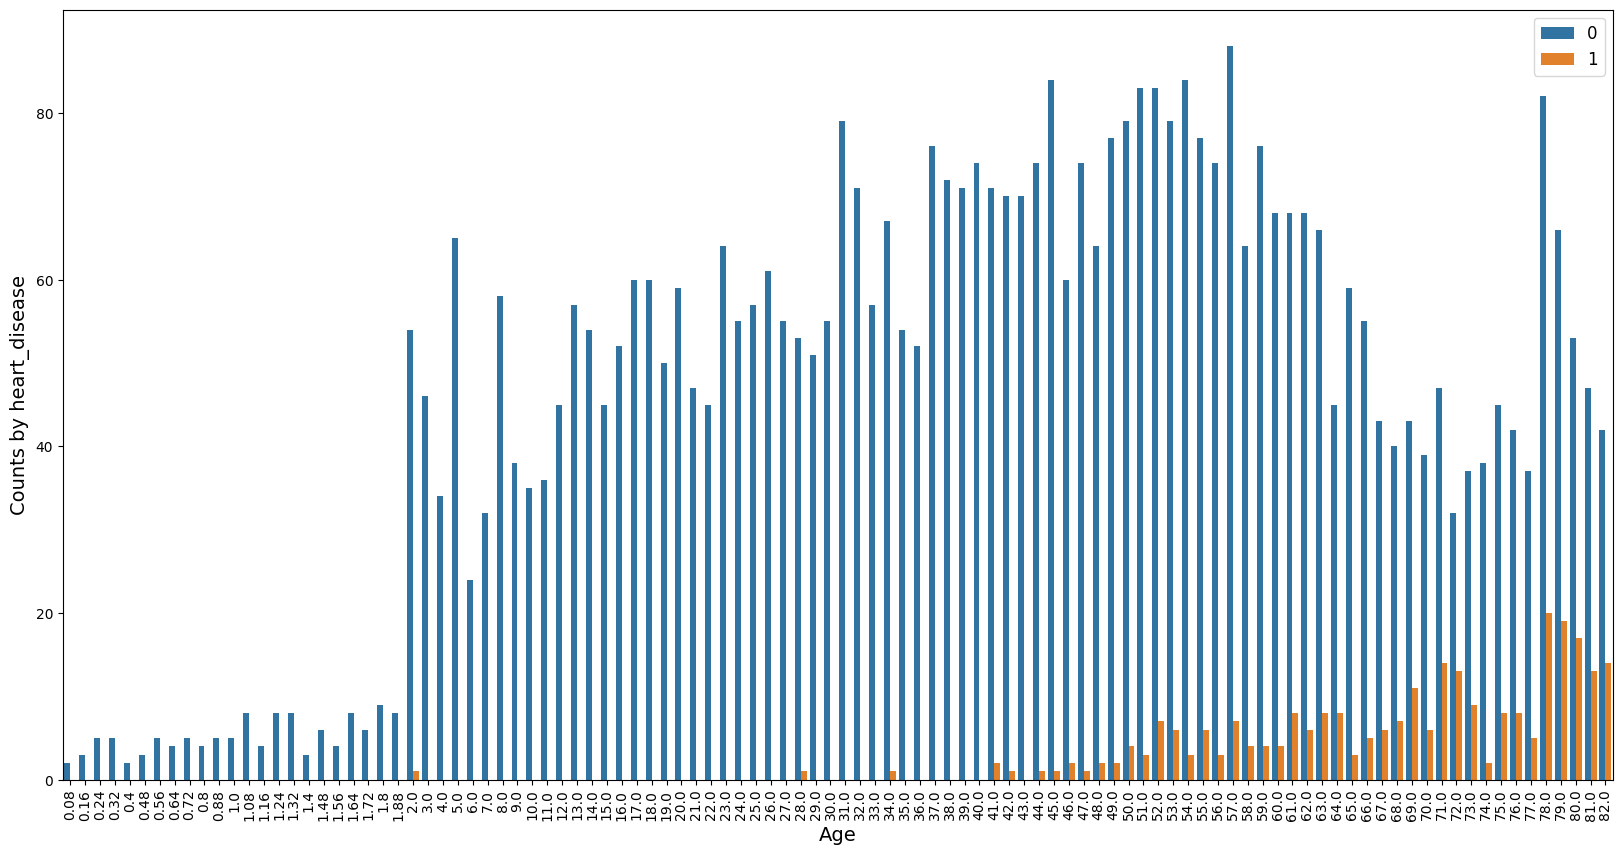

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['age'],hue = df['heart_disease'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Counts by heart_disease', fontsize=14)
plt.legend(fontsize=12)
plt.show()

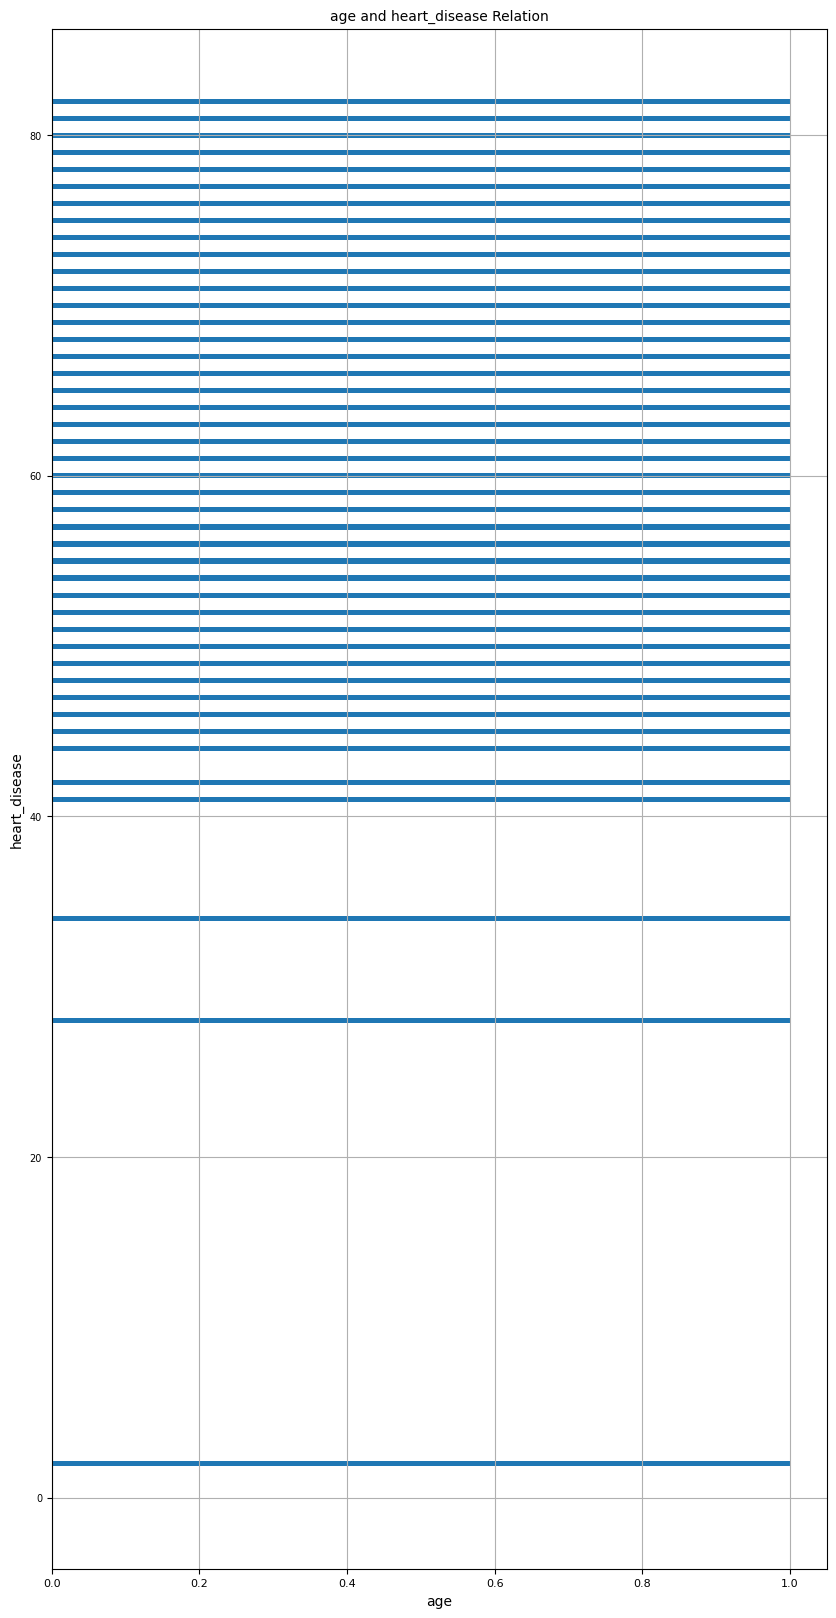

In [27]:
plt.figure(figsize=(10, 20))
plt.barh(df['age'], df['heart_disease'], height=0.3, align='center')
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.xlabel('age', fontsize=10)
plt.ylabel('heart_disease', fontsize=10)
plt.title('age and heart_disease Relation', fontsize=10)
plt.grid()
plt.show()

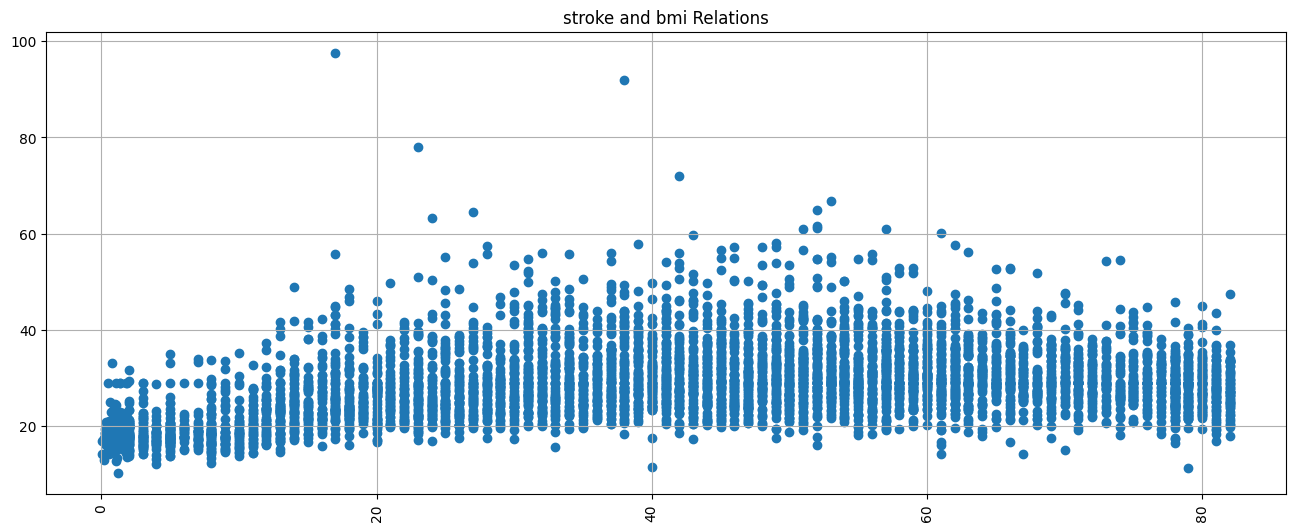

In [28]:
plt.figure(figsize=(16,6))
plt.scatter(df['age'],df['bmi'])
plt.xticks(rotation=90)
plt.title('stroke and bmi Relations')
plt.grid()
plt.show()

In [29]:
pivot_table = df.pivot_table(index=['hypertension'], values=['age'], aggfunc=['mean', 'count'])
print(pivot_table)

                   mean count
                    age   age
hypertension                 
0             41.176318  4611
1             62.244980   498


In [30]:
one_hot_features = ['age', 'stroke', 'bmi']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df['avg_glucose_level'] = label_encoder.fit_transform(df['avg_glucose_level'])
df['heart_disease'] = label_encoder.fit_transform(df['heart_disease'])
df['hypertension'] = label_encoder.fit_transform(df['hypertension'])

In [33]:
df

,Unnamed: 0,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,bmi_61.2,bmi_61.6,bmi_63.3,bmi_64.4,bmi_64.8,bmi_66.8,bmi_71.9,bmi_78.0,bmi_92.0,bmi_97.6
0,0,1,0,1,1,1,3849,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,1,0,3587,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,0,1,1,0,2483,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,3,0,0,0,1,1,3384,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,4,0,1,0,1,0,3393,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5105,0,1,0,1,1,1360,0,0,1,...,False,False,False,False,False,False,False,False,False,False
5105,5106,0,0,0,1,1,3030,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5106,5107,0,0,0,1,0,1314,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5107,5108,1,0,0,1,0,3362,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [35]:
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9432485322896281
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       967
           1       0.29      0.04      0.06        55

    accuracy                           0.94      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022



In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9099804305283757
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       967
           1       0.11      0.09      0.10        55

    accuracy                           0.91      1022
   macro avg       0.53      0.52      0.53      1022
weighted avg       0.90      0.91      0.91      1022



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()